array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299487F98C8>],
      dtype=object)

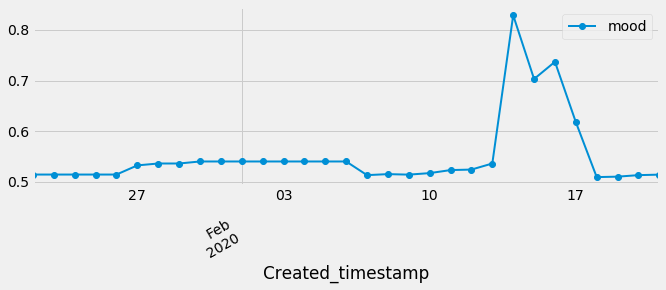

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.style.available
plt.style.use('fivethirtyeight')
from scipy.stats import zscore
from scipy import stats


df = pd.read_csv(r'C:\Users\MajidKhoshrou\Documents\python_scripts\timeseries_insights\data\keyhole_target_emotion_240220.csv', index_col='Created_timestamp', parse_dates=['Created_timestamp'])
df.sort_index( inplace=True)
assert all(df.sort_index().index == df.index)

df1 = df.loc[(df.search_terms=='philips') & (df.platforms=='all')].loc[:,['mood']]
df1 = df1.resample('D').mean().fillna(method='ffill')
df1.plot(subplots=True, layout = (2,1), linewidth=2, figsize=(10, 8), marker='o')


In [46]:
df1.head()

,mood
Created_timestamp,
2020-01-22,0.514167
2020-01-23,0.514167
2020-01-24,0.514167
2020-01-25,0.514167
2020-01-26,0.514167


In [47]:
def getProb(x):
    y = np.diff(x)
    return 1-(stats.norm.sf(abs(zscore(y)[-1]))*2) #twosided

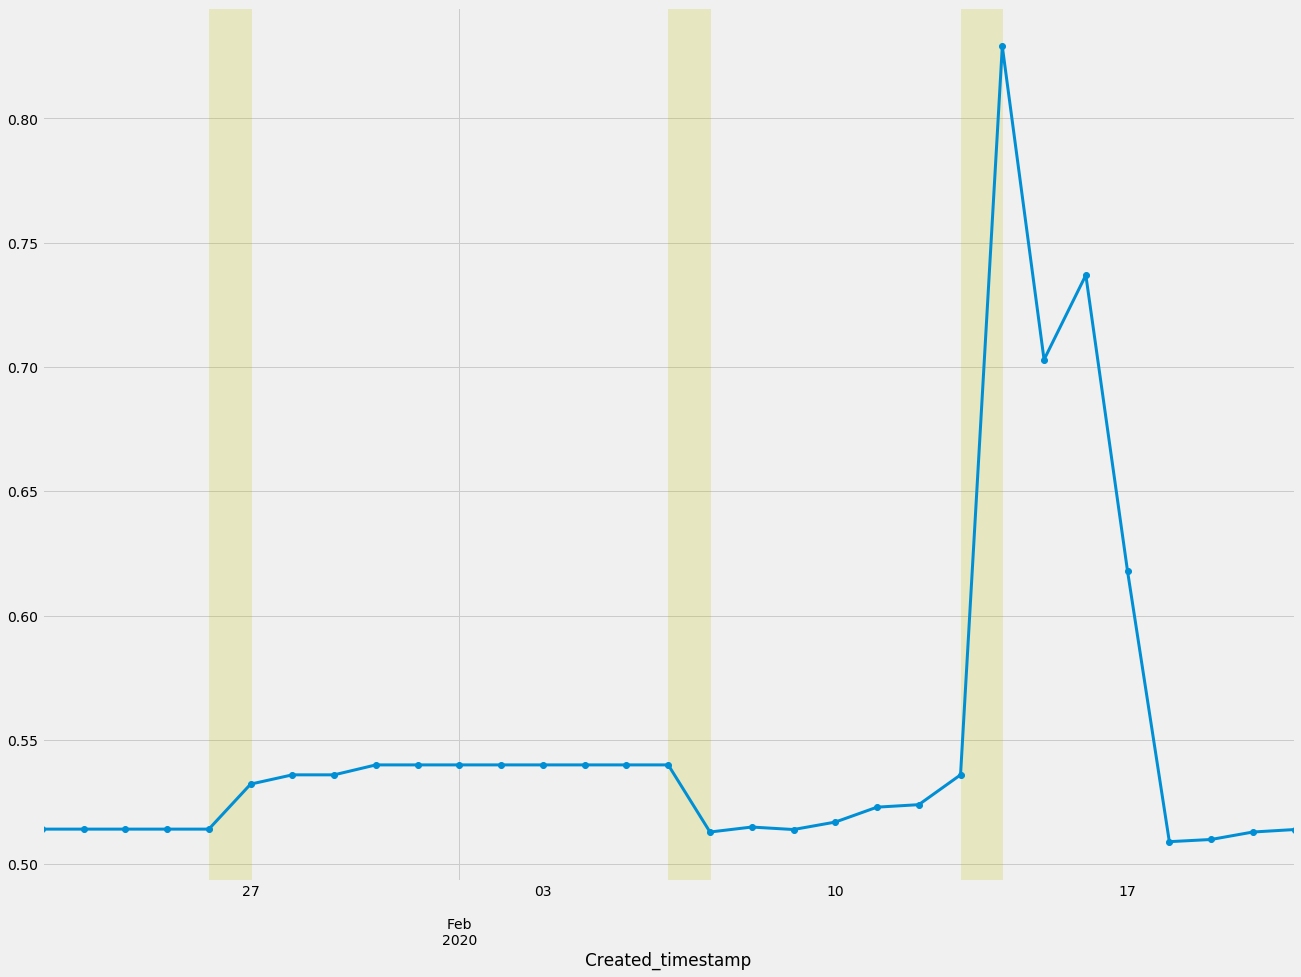

In [48]:
idx = df1.fillna(0).rolling(window=10,min_periods=3).apply(getProb, raw=True) >.95   # 95 99 995

#idx = df1.diff().abs().rolling(14,min_periods=4).apply(getProb1, raw=True)>.95

df2 = df1.loc[idx.mood.values,:]
ax2 = df1.mood.plot(figsize=(20,15), marker='o', linewidth=3)
for d in df2.index:
    ax2.axvspan(d-datetime.timedelta(1),d, color = 'y', alpha=.2)

In [49]:
print(df2.index)

DatetimeIndex(['2020-01-27', '2020-02-07', '2020-02-14'], dtype='datetime64[ns]', name='Created_timestamp', freq=None)
